In [19]:
import pandas as pd
df = pd.read_csv('training_data.txt', delimiter = "\t", header=None, names=["msg"], encoding = 'UTF-8')

In [20]:
df.head()

,msg
0,can u do check in for me
1,score ke update nai milre apke
2,i need a hotel near symbiosis college
3,i have trying this app for first time
4,your app have some bugs


['to', 'i', 'me', 'for', 'the', 'in', 'you', 'is', 'my', 'can', 'of', 'want', 'from', 'a', 'at', 'reminder', 'on', 'u', 'match', 'any']


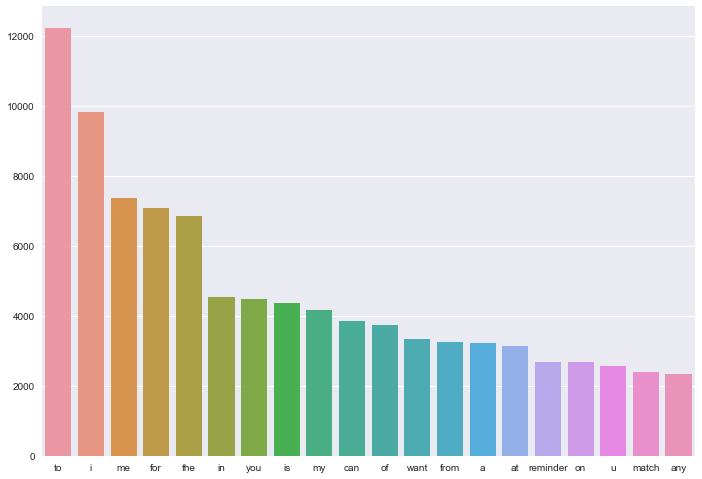

In [156]:
# Creating a list of documents from the complaints column
list_of_docs = df["msg"].tolist()
#print(list_of_docs)
# Implementing the function for all the complaints of list_of_docs
doc_clean1 = [doc.split() for doc in list_of_docs]
doc_clean_list1=[item for sublist in doc_clean1 for item in sublist]
#doc_clean_list.count('score')
import collections
import operator
import seaborn as sns
d1=dict(collections.Counter(doc_clean_list1))
top_20=sorted(d1.items(), key=operator.itemgetter(1), reverse=True)[:20]
    
# Top 20 most occuring words
top_20_words=[i[0] for i in top_20]

top_20_values=[i[1] for i in top_20]

# Display top 20 words
print(top_20_words)

sns.barplot(top_20_words,top_20_values)
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
import re sentence = 'I need need to learn regex... regex from scratch!'
# remove punctuation 
# the unicode flag makes it work for more letter types (non-ascii) 
#no_punc = re.sub(r'[^\w\s]', '', sentence, re.UNICODE) 
#print('No punctuation:', no_punc) 
# remove duplicates 
re_output = re.sub(r'\b(\w+)( \1\b)+', r'\1', no_punc) 
print('No duplicates:', re_output)

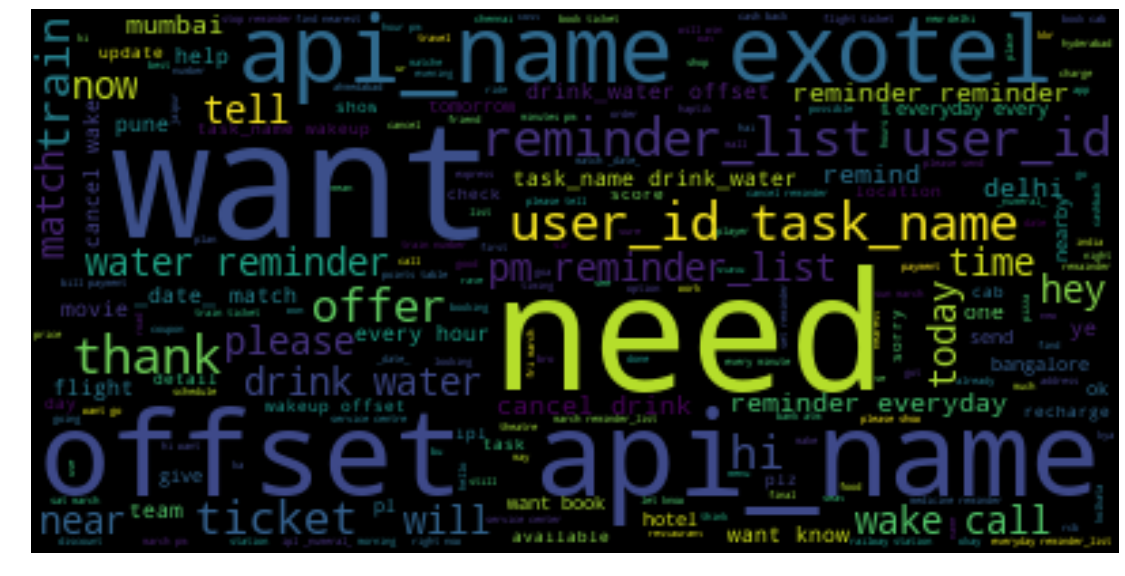

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
textall1 = " ".join(doc_clean_list1)
#print(textall)
wordcloud1 = WordCloud(max_font_size = 60).generate(textall1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import os
import numpy as np
import warnings
from nltk.corpus import stopwords
#import stop_words
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint
import re
from autocorrect import spell
from nltk.stem.porter import PorterStemmer

warnings.filterwarnings("ignore")
stop = stopwords.words('english')
stop.extend(['{','}','0','1','2','3','4','5','6','7','8','9','am','pm','would','like','get','today','list','need','offset','time','water','drink','pls','id','user','task','reminderlist','drinkwater','reminder list','drink water','apiname','userid','taskname', 'u','user_id:','task_name:', 'api_name','exotel', 'api_name:','product_id', 'api','name',"n't", 'thanks','thank','hey','please','hello','user_id','userid', 'plz','a9c0', '676951', 'hi', '727893', '55616','want','need','ll','know','go','tell','check','good','give','go','still','will','help','pl','now','looking','hai','find', 'let','ye','sorry','okay','ok'])
print(stop)
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
exclude = set(string.punctuation)

lemma = WordNetLemmatizer()
p_stemmer = PorterStemmer()
# Function to lemmatize and remove the stopwords
def clean(doc):
    punc_free = "".join(ch for ch in doc if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.lower().split() if i not in stop])
    emoji_free = emoji_pattern.sub(r'', stop_free)  
    
    normalized = " ".join(lemma.lemmatize(word) for word in emoji_free.split())
    re_output =  re.sub(r'\b(\w+)( \1\b)+', r'\1', normalized)
    #spell(word)
    

    return re_output


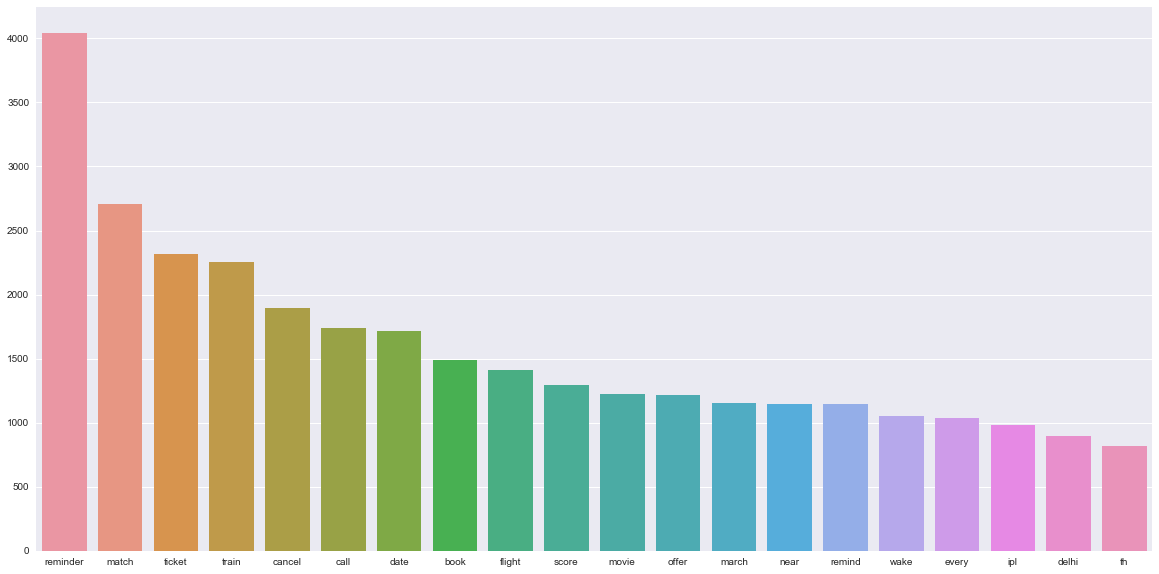

In [254]:
# Creating a list of documents from the complaints column
df["msg"]=df["msg"].apply(lambda x: re.sub('[^a-zA-Z]', ' ',x))


correctwords=[]
def spellingcorrect(a):
    for sent in words:
        for word in sent:
            print(spell(word))
            
list_of_docs = df["msg"].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean2 = [clean(doc).split() for doc in list_of_docs]
doc_clean_list2=[item for sublist in doc_clean2 for item in sublist]
doc_clean_list2.count('score')
import collections
#print(collections.Counter(doc_clean_list))
d2=dict(collections.Counter(doc_clean_list2))
top_20_new=sorted(d2.items(), key=operator.itemgetter(1), reverse=True)[:20]
    
# Top 20 most occuring words
top_20_new_words=[i[0] for i in top_20_new]

top_20_new_values=[i[1] for i in top_20_new]

# Display top 20 words
#print(top_20_words)

sns.barplot(top_20_new_words,top_20_new_values)
sns.set(rc={'figure.figsize':(20,10)})

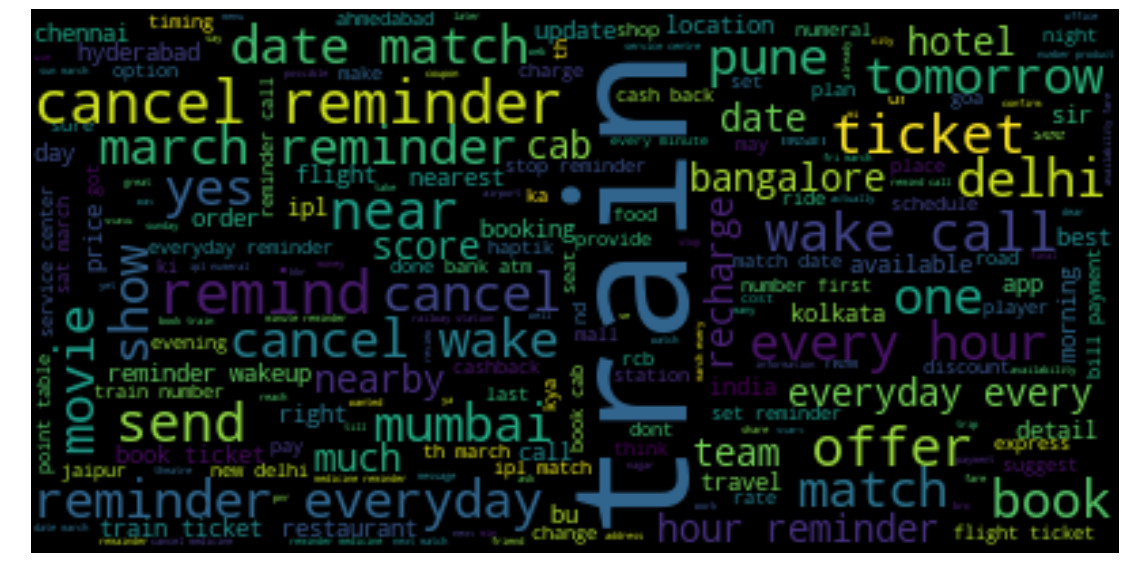

In [255]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
textall2 = " ".join(doc_clean_list2)
#print(textall)
wordcloud = WordCloud(max_font_size = 60).generate(textall2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
sorted(d2.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
print(doc_clean_list2)

In [221]:
from langdetect import detect_langs

def englishOrHindi(string):
    res = detect_langs(string)
    for item in res:
        if item.lang == "hi" or item.lang == "en":
            return item.lang
    return None
print(doc_clean_list[52412])
print(englishOrHindi(doc_clean_list[52412]))

driver
None


In [ ]:
from nltk.tag import tnt
from nltk.corpus import indian
import nltk
def hindi_model():
train_data = indian.tagged_sents('hindi.pos')
tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_data)
return tnt_pos_tagger
#text = "इराक के विदेश मंत्री ने अमरीका के उस प्रस्ताव का मजाक उड़ाया है , जिसमें अमरीका ने संयुक्त राष्ट्र के प्रतिबंधों को इराकी नागरिकों के लिए कम हानिकारक बनाने के लिए कहा है ।"
model = hindi_model()
new_tagged = (model.tag(nltk.word_tokenize(text)))
print(new_tagged)
with open("result/output.txt","a") as output_file:
output_file.write("\n[INPUT]\n")
output_file.write(text)
output_file.write("\n[OUTPUT]\n")
output_file.write(str(new_tagged))

In [ ]:
from nltk.tag import tnt
from nltk.corpus import indian
import nltk
def hindi_model():
    train_data = indian.tagged_sents('hindi.pos')
    tnt_pos_tagger = tnt.TnT()
    tnt_pos_tagger.train(train_data)
    return tnt_pos_tagger

text = "इराक के विदेश मंत्री ने अमरीका के उस प्रस्ताव का मजाक उड़ाया है , जिसमें अमरीका ने संयुक्त राष्ट्र के प्रतिबंधों को इराकी नागरिकों के लिए कम हानिकारक बनाने के लिए कहा है ।"
model = hindi_model()
new_tagged = (model.tag(nltk.word_tokenize(text)))
print(new_tagged)
with open("output.txt","a") as output_file:
    output_file.write("\n[INPUT]\n")
    output_file.write(text)
    output_file.write("\n[OUTPUT]\n")
    output_file.write(str(new_tagged))

In [ ]:
import langid
langid.set_languages(['hi', 'en'])  # ISO 639-1 codes
l1=[]
for i in range(0,len(doc_clean_list)):
    print(doc_clean_list[i])
    lang, score = langid.classify(doc_clean_list[i]) 
    l1.append(lang)
print(l)

pd.Series(l).value_counts().plot(title='English vs Hindi after processing', kind='barh', width=0.1)
plt.show()
print(pd.Series(l).value_counts())

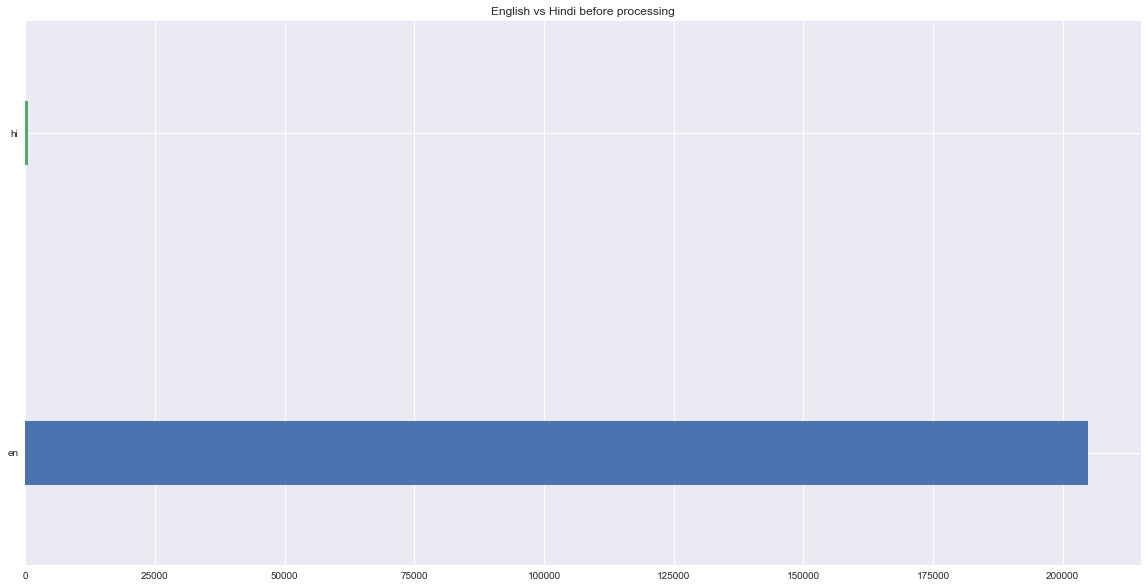

en    204913
hi       483
dtype: int64


In [249]:
pd.Series(l1).value_counts().plot(title='English vs Hindi before processing', kind='barh',width=0.2)
plt.show()
print(pd.Series(l1).value_counts())